# Netflix Movies and TV Shows 🍿🎥✮⋆˙

## 1️⃣ Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
warnings.filterwarnings('ignore')

## 2️⃣ Read the Dataset

In [2]:
path = r'Dataset\netflix_titles.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(8807, 12)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3️⃣ Exploratory Data Analysis (EDA)

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Description

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Values

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
(df.isna().sum() / df.shape[0]) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
cols = ['director', 'cast', 'country']

for col in cols:
    df[col] = df[col].fillna('Unknown')
    

cols = ['date_added', 'rating', 'duration']
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Check Duplication

In [12]:
df.duplicated().sum()

0

### Check Columns

In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Remove unnecessary columns.

In [14]:
df.drop(columns=['show_id'], axis=1, inplace=True)

#### Fix Date Column

In [15]:
df['date_added'].dtype

dtype('O')

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

#### Fix Columns Rating

In [17]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [18]:
df = df[~df['rating'].str.contains('min', na=False)]

#### Check if have outlier values

In [19]:
df['release_year'].min()

1925

In [20]:
df['release_year'].max()

2021

In [21]:
df['date_added'].dt.year.min()

2008

In [22]:
df['date_added'].dt.year.max()

2021

### Univariate Analysis

#### Distribution of Types

In [23]:
counts = df['type'].value_counts()
labels = counts.index  
values = counts.values

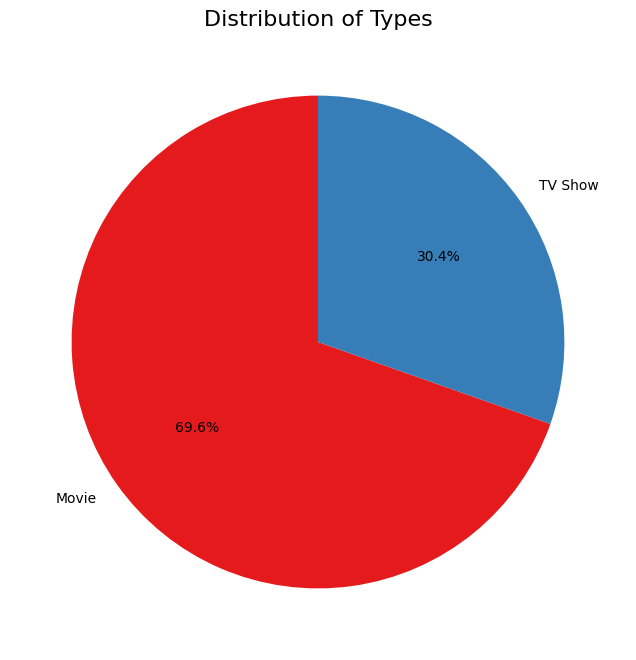

In [24]:
plt.figure(figsize=(8,8))
plt.pie(
    values,
    labels=labels,
    colors=sns.color_palette("Set1", len(labels)), 
    autopct='%1.1f%%',  
    startangle=90
)
plt.title("Distribution of Types", fontsize=16)
plt.show()

#### Distribution of Country

In [25]:
df['country'].value_counts()

country
United States                             2815
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [26]:
counts = df['country'].value_counts()
top_5 = counts.head(5)
others = pd.Series([counts[5:].sum()], index=['Others'])
plot_data = pd.concat([top_5, others])

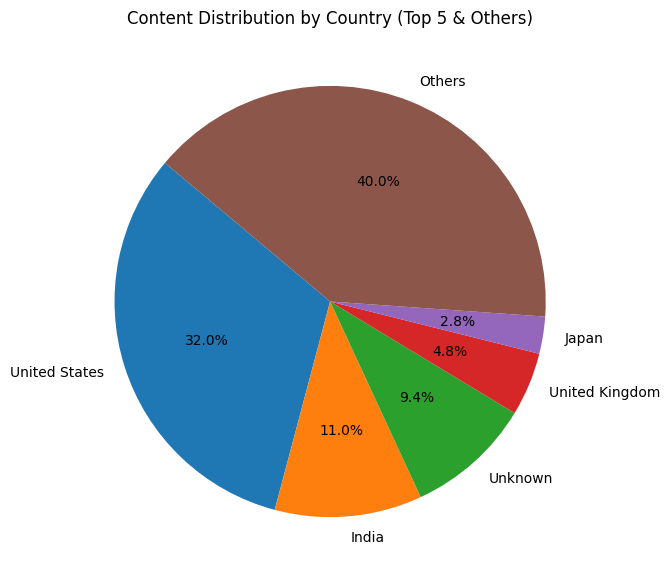

In [27]:
plt.figure(figsize=(10, 7))
plt.pie(
    plot_data.values, 
    labels=plot_data.index, 
    autopct='%1.1f%%', 
    startangle=140, 
)
plt.title('Content Distribution by Country (Top 5 & Others)')
plt.show()

**Conclusion – Titles Added Over Time**

Both Movies and TV Shows grow strongly from the mid‑2010s onward, reflecting Netflix’s rapid expansion during the streaming boom; understanding specific peaks or drops would require cross-checking with external industry events and global trends.

#### Distribution of Movie Durations

In [28]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

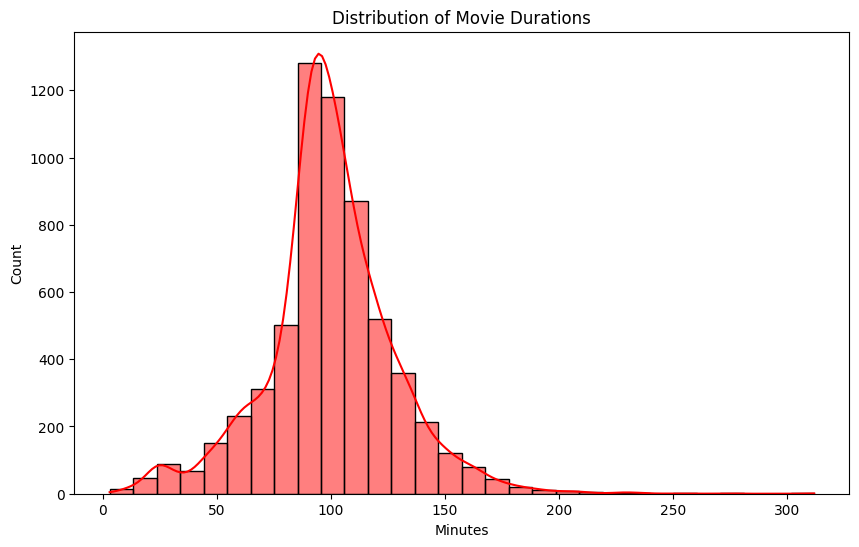

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='red')
plt.title('Distribution of Movie Durations')
plt.xlabel('Minutes')
plt.show()

**Conclusion - Movie Duration Analysis**
Netflix adheres to standard Hollywood cinema standards for movie lengths, showing little inclination towards very long (over 3 hours) or very short films, ensuring a comfortable viewing experience for users.

#### Top 15 Genres

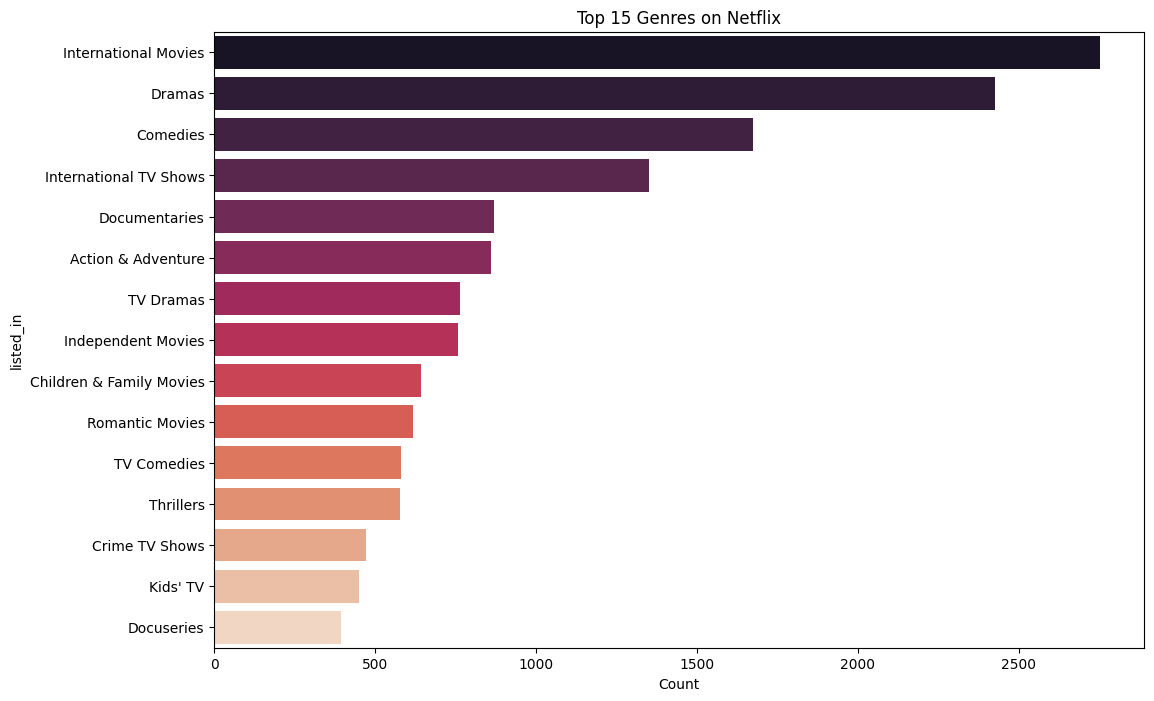

In [30]:
genres = df['listed_in'].str.split(', ').explode().reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.countplot(y=genres, order=genres.value_counts().index[:15], palette='rocket')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.show()

**Conclusion - Analysis of the Top 15 Genres**

International Movies, Dramas, and Comedies top the list as the most frequently appearing genres.<br>Insight: The success of International Movies reflects Netflix's globalization strategy, where it acquires film rights from around the world to cater to subscribers outside the US.

#### Distribution of Rating

In [31]:
df['rating'].value_counts()

rating
TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

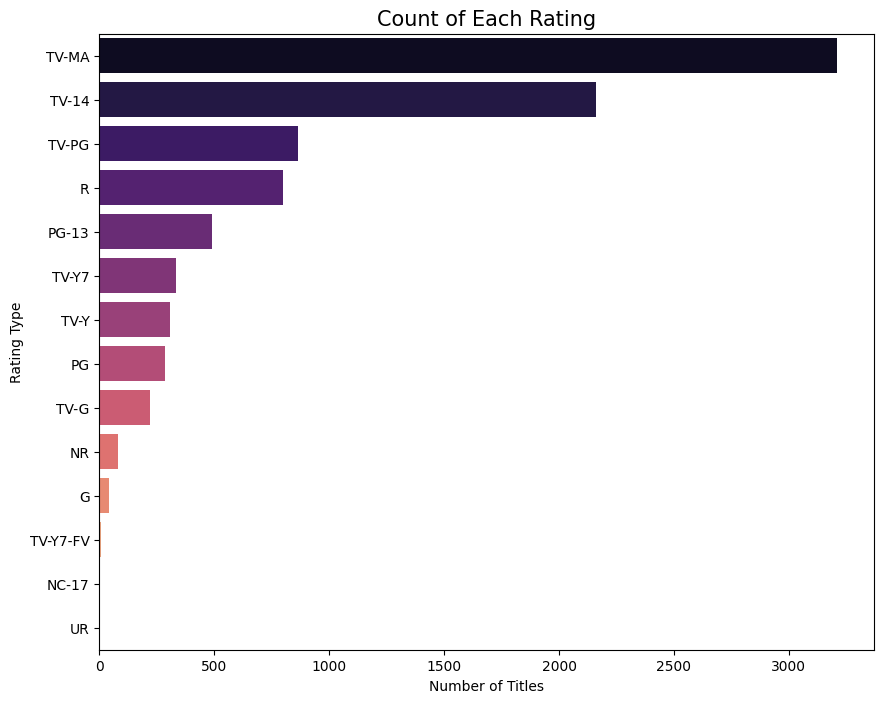

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')

plt.title('Count of Each Rating', fontsize=15)
plt.xlabel('Number of Titles')
plt.ylabel('Rating Type')
plt.show()

**Conclusion – Rating Distribution**

A few maturity ratings dominate (such as TV-MA and TV-14), indicating that Netflix focuses heavily on teen and adult audiences rather than purely children-only content.

### Bivariate Analysis

#### Distribution of Type with date_added

In [33]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year

In [34]:
data = (
    df.groupby(['type', 'year_added'])
      .size()
      .reset_index(name="count")
)

data

,type,year_added,count
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,56
8,Movie,2016,251
9,Movie,2017,838


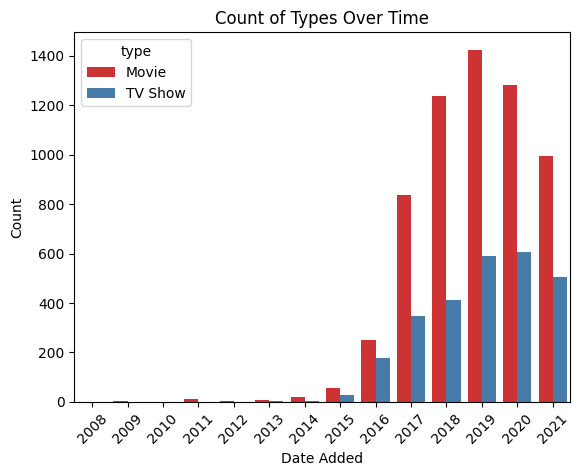

In [35]:
sns.barplot(
    data=data,
    x="year_added",
    y="count",
    hue="type",
    palette="Set1"
)

plt.xticks(rotation=45)
plt.title("Count of Types Over Time")
plt.xlabel("Date Added")
plt.ylabel("Count")
plt.show()


**Conclusion – Country Concentration vs Long Tail**

The top five countries contribute a large share of all titles, but the sizeable "Others" slice confirms a long tail of many smaller content-producing countries.

#### Distribution of Type with release_year

In [36]:
data = (
    df.groupby(['type', 'release_year'])
      .size()
      .reset_index(name="count")
)

data

,type,release_year,count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


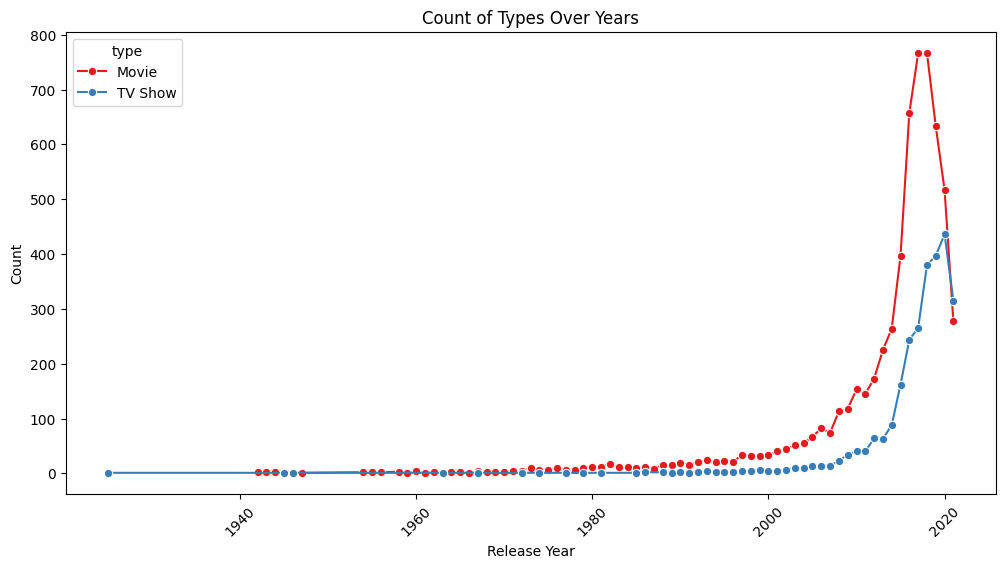

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=data,
    x="release_year",
    y="count",
    hue="type",
    marker="o",
    palette="Set1"
)
plt.title("Count of Types Over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Conclusion – Top Content Countries**

A small group of countries, led by the United States with strong contributions from India, the UK and others, produces most of the catalog, showing that Netflix’s library is concentrated in a few key markets.

#### Distribution of Type with Country

In [38]:
data = (
    df.groupby(['type', 'country'])
      .size()
      .reset_index(name="count").sort_values(by=['count'], ascending=False)
)

data

,type,country,count
525,Movie,United States,2055
218,Movie,India,893
812,TV Show,United States,760
640,Movie,Unknown,440
847,TV Show,Unknown,391
...,...,...,...
317,Movie,"New Zealand, United Kingdom, Australia",1
320,Movie,"Nigeria, United Kingdom",1
322,Movie,"Norway, Denmark, Netherlands, Sweden",1
323,Movie,"Norway, Denmark, Sweden",1


In [39]:
data.head()

,type,country,count
525,Movie,United States,2055
218,Movie,India,893
812,TV Show,United States,760
640,Movie,Unknown,440
847,TV Show,Unknown,391


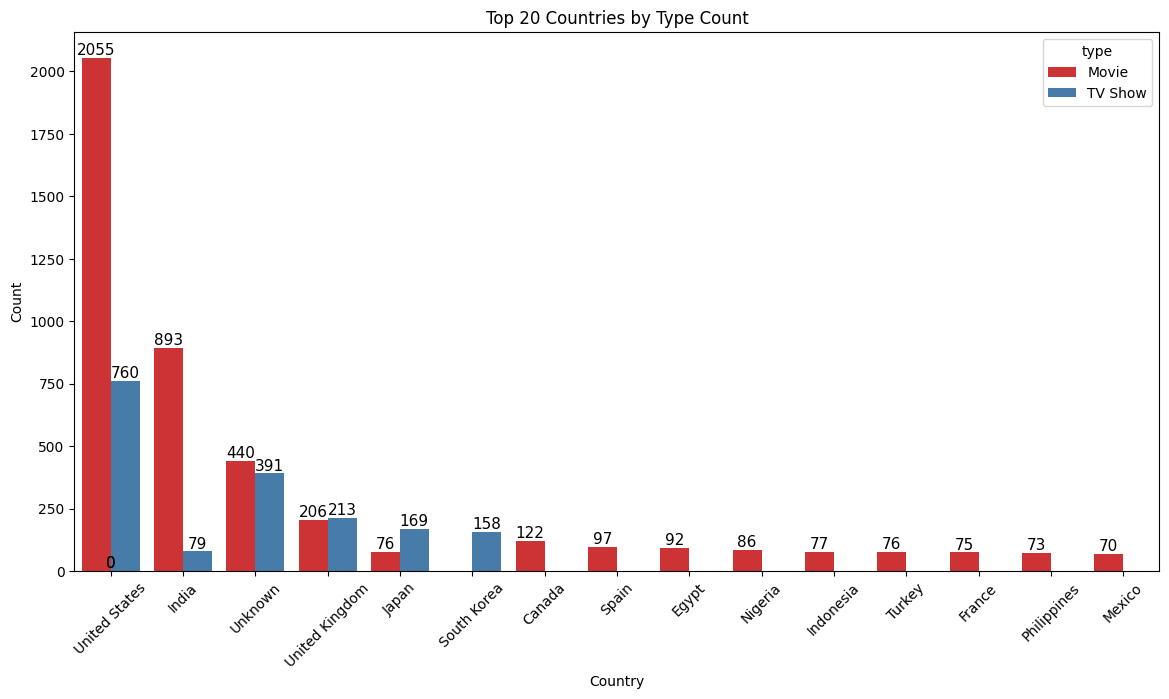

In [40]:
plt.figure(figsize=(14,7)) 
ax = sns.barplot(
    data=data.head(20),
    x="country",
    y="count",
    hue="type",
    palette="Set1",  
    dodge=True      
)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        color="black"
    )
    
plt.title("Top 20 Countries by Type Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Conclusion – Content Types Distribution**

Movies clearly dominate the catalog, while TV Shows form a smaller but still meaningful portion of the available content.

#### Average Movie Duration Over the Years

In [41]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

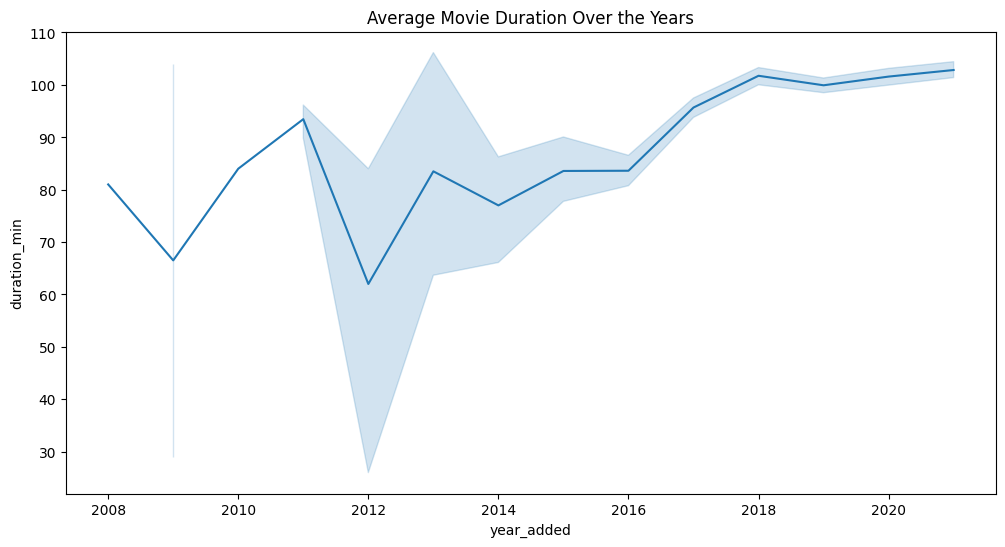

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_df, x='year_added', y='duration_min')
plt.title('Average Movie Duration Over the Years')
plt.show()

**Conclusion - Content Growth Over Time (year_added)**

We observed a dramatic increase in the rate of content additions starting in 2016, peaking in 2019.<br>Insight: The slight decrease observed in 2021 may be a direct result of the global production slowdown during the COVID-19 pandemic in 2020, which delayed the arrival of new content to the platform.

#### Rating Distribution: Movie vs TV Show

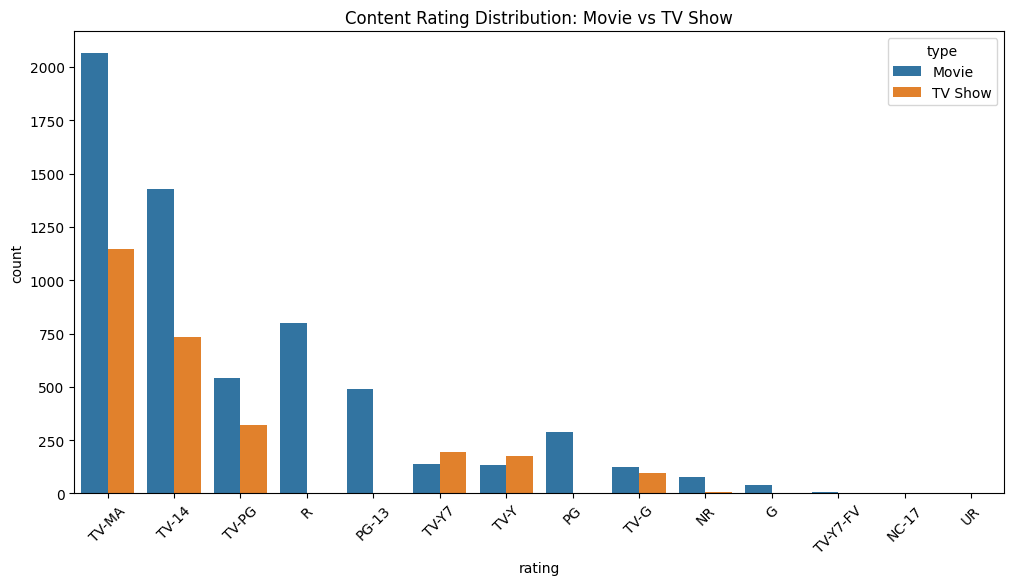

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution: Movie vs TV Show')
plt.xticks(rotation=45)
plt.show()

**Conclusion – Rating Analysis (Rating Distribution)**

Preferred Ratings: The most common ratings are TV-MA (Mature Only) and TV-14 (14+).<br>
Insight: Netflix's primary audience is young adults, and content aimed at these demographics is increasingly being marketed as child-oriented content (such as TV-G or TV-Y).

## 4️⃣ Recommendation System 

### Data Preparation

In [44]:
def prepare_data(df):
    print("🔧 Preparing data...")
    
    # 1. Text cleaning function
    def clean_text(text):
        if pd.isna(text):
            return ""
        text = str(text).lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = ' '.join(text.split())
        return text
    
    # 2. Extract genres as a list
    df['genres_list'] = df['listed_in'].apply(
        lambda x: [i.strip().lower() for i in x.split(',')] if isinstance(x, str) else []
    )
    
    # 3. Clean all text-based columns
    for col in ['title', 'description', 'director', 'cast', 'listed_in']:
        if col in df.columns:
            df[f'{col}_clean'] = df[col].apply(clean_text)
    
    return df

### Feature Engineering - Multi-Strategy

In [45]:
def create_content_features(df):
    """
    Create multiple content-based features with different importance weights
    """
    print("🎯 Creating features...")
    
    # Strategy 1: Weighted text representation
    df['weighted_text'] = (
        (df['director_clean'] + " ") * 5 +      # Director (5x weight)
        (df['listed_in_clean'] + " ") * 4 +     # Genres (4x weight)
        (df['description_clean'] + " ") * 2 +   # Description (2x weight)
        df['title_clean'] + " " +               # Title (1x)
        df['cast_clean']                        # Cast (1x)
    )
    
    # Strategy 2: Genre-only text (used for filtering)
    df['genre_text'] = df['listed_in_clean']
    
    # Strategy 3: Director + description combination
    df['director_desc'] = df['director_clean'] + " " + df['description_clean']
    
    return df

In [46]:
def build_similarity_matrices(df):
    print("📊 Building similarity matrices...")
    
    # Matrix 1: Content-Based Similarity (TF-IDF)
    tfidf_content = TfidfVectorizer(
        stop_words='english',
        max_features=8000,
        ngram_range=(1, 3),
        min_df=2,
        max_df=0.7,
        sublinear_tf=True
    )
    
    content_matrix = tfidf_content.fit_transform(df['weighted_text'])
    content_similarity = cosine_similarity(content_matrix)
    
    # Matrix 2: Genre-Based Similarity (One-Hot Encoding)
    mlb = MultiLabelBinarizer()
    genre_matrix = mlb.fit_transform(df['genres_list'])
    genre_similarity = cosine_similarity(genre_matrix)
    
    # Matrix 3: Director Similarity (Binary Rule-Based)
    def calculate_director_similarity(df):
        directors = df['director_clean'].fillna('unknown')
        n = len(directors)
        director_sim = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i, n):
                if directors.iloc[i] and directors.iloc[j]:
                    if directors.iloc[i] == directors.iloc[j] and directors.iloc[i] != 'unknown':
                        director_sim[i, j] = director_sim[j, i] = 1.0
        
        return director_sim
    
    director_similarity = calculate_director_similarity(df)
    
    # Matrix 4: Release Year Proximity
    years = df['release_year'].values
    year_diff = np.abs(years.reshape(-1, 1) - years.reshape(1, -1))
    year_similarity = 1 / (1 + year_diff / 5)  # Similarity decreases every 5 years
    
    return {
        'content': content_similarity,
        'genre': genre_similarity,
        'director': director_similarity,
        'year': year_similarity
    }


### Hybrid Recommendation Function

In [47]:
def recommend_hybrid(movie_title, df, similarity_matrices, top_n=10, 
                     filter_by_type=True, year_range=15):
    """
    Hybrid recommendation system combining multiple similarity strategies
    """
    try:
        # 1. Locate the movie/show
        idx = df[df['title'].str.lower() == movie_title.lower()].index
        
        if len(idx) == 0:
            idx = df[df['title'].str.lower().str.contains(movie_title.lower(), na=False)].index
            if len(idx) == 0:
                return f"⚠️ '{movie_title}' not found in dataset"
            print(f"ℹ️  Found: {df.iloc[idx[0]]['title']}")
        
        idx = idx[0]
        original = df.iloc[idx]
        
        print(f"\n{'='*60}")
        print(f"🎬 {original['title']} ({original['release_year']})")
        print(f"📁 Type: {original['type']}")
        print(f"🎭 Genres: {original['listed_in']}")
        print(f"🎥 Director: {original['director']}")
        print(f"{'='*60}\n")
        
        # 2. Hybrid similarity calculation
        weights = {
            'content': 0.35,
            'genre': 0.30,
            'director': 0.25,
            'year': 0.10
        }
        
        hybrid_similarity = np.zeros(len(df))
        for key, weight in weights.items():
            hybrid_similarity += weight * similarity_matrices[key][idx]
        
        # 3. Filtering and ranking
        hybrid_similarity[idx] = 0
        
        if filter_by_type:
            hybrid_similarity *= (df['type'] == original['type'])
        
        hybrid_similarity *= (
            np.abs(df['release_year'] - original['release_year']) <= year_range
        )
        
        top_indices = np.argsort(hybrid_similarity)[::-1][:top_n]
        top_indices = [i for i in top_indices if hybrid_similarity[i] > 0][:top_n]
        
        if len(top_indices) == 0:
            return "⚠️ No suitable recommendations found."
        
        # 4. Output formatting
        results = df.iloc[top_indices][[
            'title', 'type', 'release_year', 'director', 'listed_in'
        ]].copy()
        
        results['similarity_score'] = [
            f"{hybrid_similarity[i]:.2%}" for i in top_indices
        ]
        
        print(f"✨ Top {len(results)} recommendations:\n")
        
        for rank, (_, row) in enumerate(results.iterrows(), 1):
            print(f"{rank}. 🎬 {row['title']} ({row['release_year']}) - {row['similarity_score']}")
            print(f"   📁 {row['type']} | 🎭 {row['listed_in'][:50]}...")
            print(f"   🎥 {row['director'][:40]}\n")
        
        return results
    
    except Exception as e:
        return f"❌ Error: {str(e)}"


### Advanced Search Function

In [48]:
def search_content(keyword, df, max_results=10):
    """
    Keyword-based search across multiple text fields
    """
    keyword = keyword.lower()
    
    mask = (
        df['title'].str.lower().str.contains(keyword, na=False) |
        df['description'].str.lower().str.contains(keyword, na=False) |
        df['cast'].str.lower().str.contains(keyword, na=False) |
        df['director'].str.lower().str.contains(keyword, na=False)
    )
    
    results = df[mask][[
        'title', 'type', 'release_year', 'director', 'listed_in'
    ]].head(max_results)
    
    if len(results) == 0:
        print(f"⚠️ No results found for '{keyword}'")
    else:
        print(f"🔍 Found {len(results)} results:\n")
        for _, row in results.iterrows():
            print(f"• {row['title']} ({row['release_year']}) - {row['type']}")
    
    return results


### Evaluation Function

In [49]:
def test_system(df, similarity_matrices, test_movies=None):
    """
    Test the recommendation system using predefined titles
    """
    if test_movies is None:
        test_movies = [
            "Inception",
            "The Dark Knight",
            "Stranger Things",
            "Breaking Bad",
            "The Matrix"
        ]
    
    print("\n" + "="*60)
    print("🧪 Full System Evaluation")
    print("="*60 + "\n")
    
    for movie in test_movies:
        recommend_hybrid(movie, df, similarity_matrices, top_n=5)
        print("\n" + "─"*60 + "\n")


### Main Function

In [50]:
def build_recommendation_system(df):
    """
    Full pipeline to build the recommendation system
    """
    print("\n" + "="*60)
    print("🚀 Building Recommendation System")
    print("="*60 + "\n")
    
    df = prepare_data(df)
    df = create_content_features(df)
    similarity_matrices = build_similarity_matrices(df)
    
    print("\n✅ System is ready for use!\n")
    
    return df, similarity_matrices

### Test

In [51]:
df_prepared, sim_matrices = build_recommendation_system(df)

recommend_hybrid("Inception", df_prepared, sim_matrices, top_n=5)

search_content("christopher nolan", df_prepared)

test_system(df_prepared, sim_matrices)

recommend_hybrid(
    "Inception",
    df_prepared,
    sim_matrices,
    top_n=10,
    filter_by_type=False,
    year_range=20
)


🚀 Building Recommendation System

🔧 Preparing data...
🎯 Creating features...
📊 Building similarity matrices...

✅ System is ready for use!


🎬 Inception (2010)
📁 Type: Movie
🎭 Genres: Action & Adventure, Sci-Fi & Fantasy, Thrillers
🎥 Director: Christopher Nolan

✨ Top 4 recommendations:

1. 🎬 Clash of the Titans (2010) - 16.40%
   📁 Movie | 🎭 Action & Adventure, Sci-Fi & Fantasy...
   🎥 Louis Leterrier

2. 🎬 Skyline (2010) - 18.07%
   📁 Movie | 🎭 Action & Adventure, Sci-Fi & Fantasy...
   🎥 Colin Strause, Greg Strause

3. 🎬 Battle: Los Angeles (2011) - 43.31%
   📁 Movie | 🎭 Action & Adventure, Sci-Fi & Fantasy...
   🎥 Jonathan Liebesman

4. 🎬 Planet Hulk (2010) - 3.85%
   📁 Movie | 🎭 Action & Adventure, Sci-Fi & Fantasy...
   🎥 Sam Liu

🔍 Found 1 results:

• Inception (2010) - Movie

🧪 Full System Evaluation


🎬 Inception (2010)
📁 Type: Movie
🎭 Genres: Action & Adventure, Sci-Fi & Fantasy, Thrillers
🎥 Director: Christopher Nolan

✨ Top 4 recommendations:

1. 🎬 Clash of the Titans (201

,title,type,release_year,director,listed_in,similarity_score
6492,Clash of the Titans,Movie,2010,Louis Leterrier,"Action & Adventure, Sci-Fi & Fantasy",16.40%
8035,Skyline,Movie,2010,"Colin Strause, Greg Strause","Action & Adventure, Sci-Fi & Fantasy",18.07%
8217,The Book of Eli,Movie,2010,"Albert Hughes, Allen Hughes","Action & Adventure, Sci-Fi & Fantasy",3.57%
970,Battle: Los Angeles,Movie,2011,Jonathan Liebesman,"Action & Adventure, Sci-Fi & Fantasy",43.31%
7749,Planet Hulk,Movie,2010,Sam Liu,"Action & Adventure, Sci-Fi & Fantasy",3.85%
7021,Hulk Vs.,Movie,2009,"Sam Liu, Frank Paur","Action & Adventure, Sci-Fi & Fantasy",2.50%
949,The Darkest Hour,Movie,2011,Chris Gorak,"Action & Adventure, Sci-Fi & Fantasy",42.47%
7966,Season of the Witch,Movie,2011,Dominic Sena,"Action & Adventure, Sci-Fi & Fantasy",26.83%
8356,The Imaginarium of Doctor Parnassus,Movie,2009,Terry Gilliam,"Action & Adventure, Sci-Fi & Fantasy",5.00%
594,Star Trek,Movie,2009,J.J. Abrams,"Action & Adventure, Sci-Fi & Fantasy",41.74%


In [52]:
recommend_hybrid("The Dark Knight", df_prepared, sim_matrices, top_n=5)

"⚠️ 'The Dark Knight' not found in dataset"

In [53]:
recommend_hybrid("Interstellar", df_prepared, sim_matrices, top_n=5)

"⚠️ 'Interstellar' not found in dataset"

In [54]:
recommend_hybrid("Stranger Things", df_prepared, sim_matrices, top_n=5)


🎬 Stranger Things (2019)
📁 Type: TV Show
🎭 Genres: TV Horror, TV Mysteries, TV Sci-Fi & Fantasy
🎥 Director: Unknown

✨ Top 4 recommendations:

1. 🎬 Nightflyers (2018) - 61.77%
   📁 TV Show | 🎭 TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   🎥 Unknown

2. 🎬 Chilling Adventures of Sabrina (2020) - 59.67%
   📁 TV Show | 🎭 TV Horror, TV Mysteries, TV Sci-Fi & Fantasy...
   🎥 Unknown

3. 🎬 The OA (2019) - 46.37%
   📁 TV Show | 🎭 TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy...
   🎥 Unknown

4. 🎬 Warrior Nun (2020) - 44.90%
   📁 TV Show | 🎭 TV Action & Adventure, TV Mysteries, TV Sci-Fi & F...
   🎥 Unknown



,title,type,release_year,director,listed_in,similarity_score
3187,Nightflyers,TV Show,2018,Unknown,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",61.77%
1473,Chilling Adventures of Sabrina,TV Show,2020,Unknown,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",59.67%
3986,The OA,TV Show,2019,Unknown,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",46.37%
2303,Warrior Nun,TV Show,2020,Unknown,"TV Action & Adventure, TV Mysteries, TV Sci-Fi...",44.90%


In [55]:
recommend_hybrid("Shutter Island", df_prepared, sim_matrices, top_n=5)


🎬 Shutter Island (2010)
📁 Type: Movie
🎭 Genres: Thrillers
🎥 Director: Martin Scorsese

✨ Top 5 recommendations:

1. 🎬 The Departed (2006) - 5.00%
   📁 Movie | 🎭 Dramas, Thrillers...
   🎥 Martin Scorsese

2. 🎬 Hugo (2011) - 49.28%
   📁 Movie | 🎭 Children & Family Movies, Dramas...
   🎥 Martin Scorsese

3. 🎬 Gangs of New York (2002) - 4.17%
   📁 Movie | 🎭 Dramas...
   🎥 Martin Scorsese

4. 🎬 The Irishman (2019) - 45.65%
   📁 Movie | 🎭 Dramas...
   🎥 Martin Scorsese

5. 🎬 Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese (2019) - 45.07%
   📁 Movie | 🎭 Documentaries, Music & Musicals...
   🎥 Martin Scorsese



,title,type,release_year,director,listed_in,similarity_score
8272,The Departed,Movie,2006,Martin Scorsese,"Dramas, Thrillers",5.00%
2860,Hugo,Movie,2011,Martin Scorsese,"Children & Family Movies, Dramas",49.28%
6826,Gangs of New York,Movie,2002,Martin Scorsese,Dramas,4.17%
3227,The Irishman,Movie,2019,Martin Scorsese,Dramas,45.65%
3759,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Movie,2019,Martin Scorsese,"Documentaries, Music & Musicals",45.07%


**Conclusion – Hybrid Recommendation System**

The hybrid model returns recommendations that share genres, directors and similar release years with the input title, and the sample tests (e.g., *Inception*, *Stranger Things*, *Shutter Island*) show coherent, closely related suggestions that look realistic for a Netflix-style experience.

## Thank You 🎀🫶🏻💌